In [ ]:
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
import itertools
import pandas as pd
import glob
import os
import random
import time

import seaborn as sns
import pytraj as pt
import nglview as nv

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/thor/surfdrive/Scripts/notebooks/HNS-sequence/WorkingDir/')
import PyMDNA as mdna

%load_ext autoreload
%autoreload 2

### Analyze FI MD trajectories

In [5]:
def load_trajs(loc, idx_i=0, idx_f=10):
    return [md.load(loc+f'dry_{idx}.xtc',top=loc+f'dry_{idx}.pdb').remove_solvent() for idx in range(idx_i, idx_f)]

loc = '/Users/thor/surfdrive/Scripts/notebooks/HNS-sequence/WorkingDir/data/MD/HNS_and_DNA/FI_sims/cAT-1_WT/drytrajs/'
trajs = load_trajs(loc) 

In [6]:
protein_donors = {'GLN34':['N','NE2'],
                  'GLY35':['N'],
                  'ARG36':['N','NE','NH1','NH2']}

minor_acceptors = {'DA':['N3'],
                   'DT':['O2'],
                   'DC':['O2'],
                   'DG':['N3']}

major_acceptors = {'DA':['N7'],
                   'DT':['"O4\'"'],
                   'DC':['None'],
                   'DG':['"O4\'"','N7']}

In [143]:
d0 = 0.25
r0 = 0.4
nn = 2
mm = 4
contacts = [mdna.ContactCount(traj,protein_donors,minor_acceptors,d0,r0,nn,mm) for traj in trajs]

Text(18.0, 0.5, '$C_{QGR-minor}$')

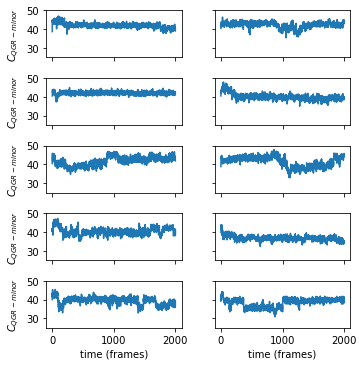

In [172]:
fig,axes = plt.subplots(5,2,figsize=[5,5],sharey=True,sharex=True)
fig.tight_layout()
axes = axes.flatten()
for ax,c in zip(axes,contacts):
    ax.plot(c.get_total_contacts())
    ax.set_ylim(25,50)
    
# add labels
axes[-1].set_xlabel('time (frames)')
axes[-2].set_xlabel('time (frames)')
axes[-2].set_ylabel('$C_{QGR-minor}$')
axes[-4].set_ylabel('$C_{QGR-minor}$')
axes[-6].set_ylabel('$C_{QGR-minor}$')
axes[-8].set_ylabel('$C_{QGR-minor}$')
axes[0].set_ylabel('$C_{QGR-minor}$')

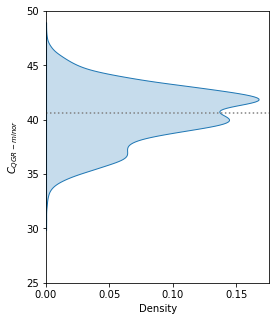

In [145]:
all_contacts = np.array([c.get_total_contacts() for c in contacts]).flatten()
fig,ax = plt.subplots(figsize=[4,5])
sns.kdeplot(y=all_contacts,fill=True)
ax.set_ylim(25,50)
ax.set_ylabel('$C_{QGR-minor}$')

median = np.median(all_contacts)
ax.axhline(median,c='gray',ls=':')

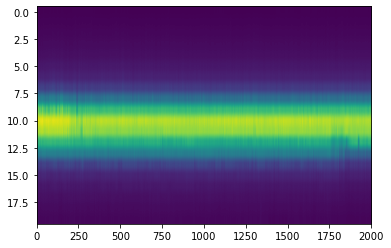

In [146]:
c = contacts[0]
c_bp = c.get_contacts_per_bp()
plt.imshow(c_bp,aspect='auto')

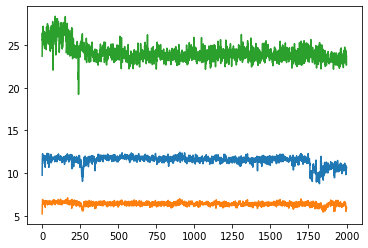

In [147]:
c_res = c.get_contacts_per_residue()
plt.plot(c_res.T)

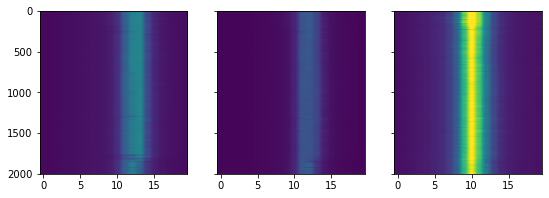

In [148]:
c_resbp = c.get_contacts_per_residue_per_bp()

fig,ax=plt.subplots(1,3,figsize=[9,3],sharey=True)
ax[0].imshow(c_resbp[0],aspect='auto',vmin=0,vmax=3)
ax[1].imshow(c_resbp[1],aspect='auto',vmin=0,vmax=3)
ax[2].imshow(c_resbp[2],aspect='auto',vmin=0,vmax=3)

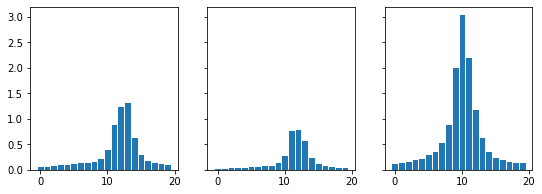

In [149]:
c_resbp = c.get_contacts_per_residue_per_bp()
fig,ax=plt.subplots(1,3,figsize=[9,3],sharey=True)
idx = 0
for c in c_resbp:
    ax[idx].bar(x=range(0,20),height=np.mean(c,axis=0),width=1,lw=1,edgecolor='white')
    idx+=1

<BarContainer object of 20 artists>

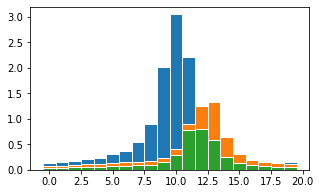

In [162]:
c_resbp = contacts[0].get_contacts_per_residue_per_bp()
fig,ax=plt.subplots(figsize=[5,3],sharey=True)

bp_indices = range(0,20)
ax.bar(x=bp_indices,height=np.mean(c_resbp[2],axis=0),width=1,lw=1,edgecolor='white')
ax.bar(x=bp_indices,height=np.mean(c_resbp[0],axis=0),width=1,lw=1,edgecolor='white')
ax.bar(x=bp_indices,height=np.mean(c_resbp[1],axis=0),width=1,lw=1,edgecolor='white')